In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install patchify

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify

from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmaxscaler = MinMaxScaler()

In [2]:
#root_directory = "/content/drive/My Drive/Colab Notebooks/datasets/"

In [3]:
dataset_root_folder = "/content/drive/My Drive/Colab Notebooks/datasets/"

In [4]:
for path, subdirs, files in os.walk(dataset_root_folder):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    #print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith(".jpg")):
        #print(image_name)
        a = True

In [5]:
image_patch_size = 256

In [6]:
image = cv2.imread(f'{dataset_root_folder}/images/10.jpg', 1)

In [7]:
image.shape

(2160, 2132, 3)

In [8]:
(image.shape[0] // image_patch_size) *image_patch_size

2048

In [9]:
print(type(image))

<class 'numpy.ndarray'>


In [10]:
type(Image.fromarray(image))

PIL.Image.Image

In [11]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [12]:
len(image_patches)

8

In [13]:
print(image_patches.shape)

(8, 8, 1, 256, 256, 3)


In [14]:
image_x = image_patches[0, 0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [15]:
image_y[0].shape

(256, 256, 3)

### Read and processing satellite images

In [16]:
image_dataset = []

image_extension = 'jpg' #jpg
image_type = 'images'    #images
for image_id in range(5, 18):
  image = cv2.imread(f'{dataset_root_folder}/{image_type}/{image_id}.{image_extension}', 1)
  if image is not None:
    #print(image.shape)
    size_x = (image.shape[1] // image_patch_size) *image_patch_size
    size_y = (image.shape[0] // image_patch_size) *image_patch_size
    #print('{} --- {} - {}'.format(image.shape, size_x, size_y))
    image = Image.fromarray(image)
    image = image.crop((0, 0, size_x, size_y))
    #print('{}, {}'.format(image.size[0], image.size[1]))
    image = np.array(image)
    patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
    #print(len(patched_images))
    for i in range(patched_images.shape[0]):
      for j in range(patched_images.shape[1]):
        individual_patched_image = patched_images[i,j,:,:]
        #print(individual_patched_image.shape)
        individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
        individual_patched_image = individual_patched_image[0]
        #print(individual_patched_image.shape)
        image_dataset.append(individual_patched_image)


In [17]:
len(image_dataset)

1104

### processing mask images

In [18]:
mask_dataset = []

image_extension = 'png'
image_type = 'masks'    #images
for image_id in range(5, 18):
  image = cv2.imread(f'{dataset_root_folder}/{image_type}/{image_id}.{image_extension}', 1)
  if image is not None:
    #print(image.shape)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    size_x = (image.shape[1] // image_patch_size) *image_patch_size
    size_y = (image.shape[0] // image_patch_size) *image_patch_size
    #print('{} --- {} - {}'.format(image.shape, size_x, size_y))
    image = Image.fromarray(image)
    image = image.crop((0, 0, size_x, size_y))
    #print('{}, {}'.format(image.size[0], image.size[1]))
    image = np.array(image)
    patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
    #print(len(patched_images))
    for i in range(patched_images.shape[0]):
      for j in range(patched_images.shape[1]):
        individual_patched_mask = patched_images[i,j,:,:]
        #print(individual_patched_image.shape)
        #individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
        individual_patched_mask = individual_patched_mask[0]
        #print(individual_patched_image.shape)
        mask_dataset.append(individual_patched_mask)


In [19]:
len(mask_dataset)

1104

In [20]:
image_dataset[0]

array([[[0.27777778, 0.26359833, 0.29761905],
        [0.28205128, 0.26778243, 0.3015873 ],
        [0.24358974, 0.22594142, 0.26984127],
        ...,
        [0.5042735 , 0.48953975, 0.53571429],
        [0.49145299, 0.47698745, 0.52777778],
        [0.47435897, 0.47280335, 0.51587302]],

       [[0.40598291, 0.37656904, 0.40873016],
        [0.36752137, 0.33891213, 0.37301587],
        [0.31623932, 0.28870293, 0.32936508],
        ...,
        [0.52136752, 0.50627615, 0.5515873 ],
        [0.4957265 , 0.48117155, 0.53174603],
        [0.47008547, 0.46861925, 0.51190476]],

       [[0.54700855, 0.50627615, 0.53174603],
        [0.47008547, 0.43096234, 0.46031746],
        [0.40598291, 0.36401674, 0.4047619 ],
        ...,
        [0.52991453, 0.51882845, 0.5515873 ],
        [0.5042735 , 0.48953975, 0.53571429],
        [0.48290598, 0.48117155, 0.52380952]],

       ...,

       [[0.3974359 , 0.41422594, 0.23809524],
        [0.38461538, 0.40167364, 0.22619048],
        [0.38461538, 0

In [21]:
mask_dataset[0]

array([[[68,  1, 84],
        [68,  1, 84],
        [68,  1, 84],
        ...,
        [68,  1, 84],
        [68,  1, 84],
        [68,  1, 84]],

       [[68,  1, 84],
        [68,  1, 84],
        [68,  1, 84],
        ...,
        [68,  1, 84],
        [68,  1, 84],
        [68,  1, 84]],

       [[68,  1, 84],
        [68,  1, 84],
        [68,  1, 84],
        ...,
        [68,  1, 84],
        [68,  1, 84],
        [68,  1, 84]],

       ...,

       [[68,  1, 84],
        [68,  1, 84],
        [68,  1, 84],
        ...,
        [68,  1, 84],
        [68,  1, 84],
        [68,  1, 84]],

       [[68,  1, 84],
        [68,  1, 84],
        [68,  1, 84],
        ...,
        [68,  1, 84],
        [68,  1, 84],
        [68,  1, 84]],

       [[68,  1, 84],
        [68,  1, 84],
        [68,  1, 84],
        ...,
        [68,  1, 84],
        [68,  1, 84],
        [68,  1, 84]]], dtype=uint8)

In [22]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [23]:
print(image_dataset.shape)
print(mask_dataset.shape)

(1104, 256, 256, 3)
(1104, 256, 256, 3)


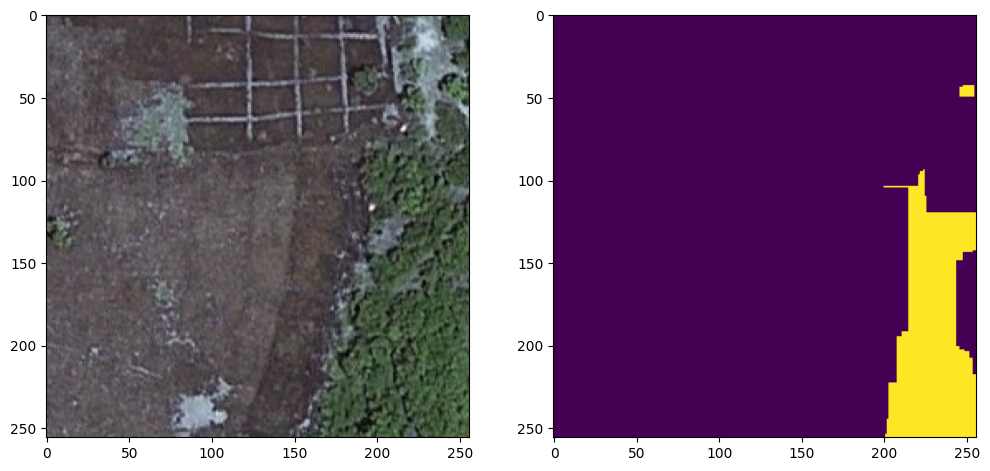

In [24]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_dataset[image_number])
plt.show()

### Processing mask image labels

In [25]:
tree = '#440154'.lstrip('#')
tree = np.array(tuple(int(tree[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

non_tree = '#fde724'.lstrip('#')
non_tree = np.array(tuple(int(non_tree[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

print(tree)
print(non_tree)


[68  1 84]
[253 231  36]


In [26]:
label = individual_patched_mask

In [27]:
def rgb_to_label(label):
    label_segment = np.zeros(label.shape,dtype=np.uint8)
    label_segment [np.all(label == tree,axis=-1)] = 0
    label_segment [np.all(label==non_tree,axis=-1)] = 1
    label_segment = label_segment[:,:,0]
    return label_segment

In [28]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_label(mask_dataset[i])
    labels.append(label)

In [29]:
print(len(labels))

1104


In [30]:
labels[1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [31]:
labels = np.array(labels)

In [32]:
labels[3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [33]:
labels = np.expand_dims(labels, axis=3)

In [34]:
labels[0]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [35]:
np.unique(labels)

array([0, 1], dtype=uint8)

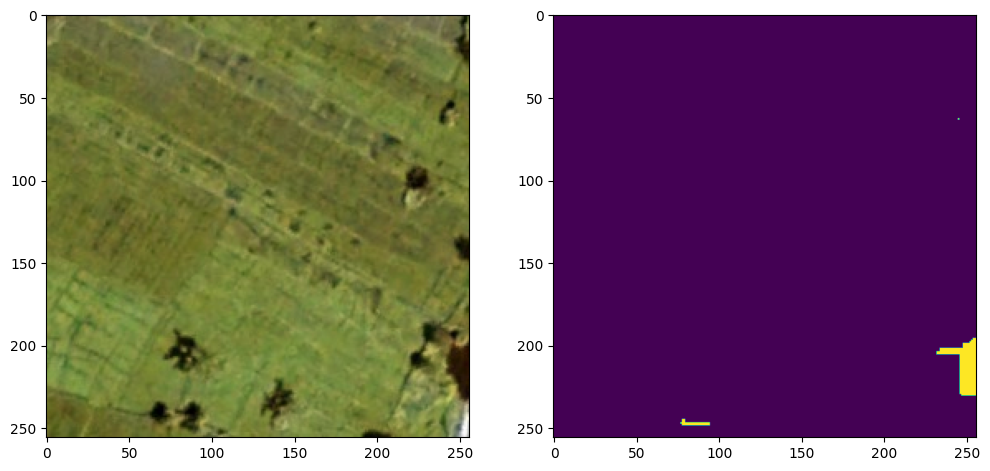

In [36]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
#plt.imshow(mask_dataset[image_number])
plt.imshow(labels[image_number][:,:,0])
#plt.show()

### Training and Test split

In [37]:
total_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_categorical_dataset, test_size = 0.15, random_state = 42)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(938, 256, 256, 3)
(938, 256, 256, 2)
(166, 256, 256, 3)
(166, 256, 256, 2)


In [39]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

## Deep Learning

In [40]:
!pip install -U segmentation-models

In [41]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [42]:
from keras import backend as K

In [43]:
import tensorflow as tf

In [44]:
tf.keras.backend.clear_session()

In [45]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [46]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
2


In [47]:
def multi_unet_model(n_classes=2, image_height=256, image_width=256, image_channels=1):
  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

  outputs = Conv2D(n_classes, (1,1), activation='softmax')(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model


In [48]:
metrics = ['accuracy', jaccard_coef]

In [49]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
2


In [50]:
def get_deep_learning_model():
  return multi_unet_model(n_classes= total_classes,
                          image_height= image_height ,
                          image_width= image_width,
                          image_channels= image_channels)

In [51]:
model = get_deep_learning_model()

In [52]:
#model.get_config()

In [53]:
weights = [0.5, 0.5]

In [54]:
#import segmentation_models as sm

In [55]:
!pip install -U -q segmentation-models
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [56]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [57]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [58]:
total_loss = dice_loss + (1 * focal_loss)

In [59]:
model.compile(optimizer='adam', loss=total_loss, metrics=metrics)

In [60]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [61]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/100
59/59 [==============================] - 46s 289ms/step - loss: 0.7249 - accuracy: 0.7281 - jaccard_coef: 0.5009 - val_loss: 0.6763 - val_accuracy: 0.7956 - val_jaccard_coef: 0.6084
Epoch 2/100
59/59 [==============================] - 12s 202ms/step - loss: 0.6799 - accuracy: 0.7868 - jaccard_coef: 0.5998 - val_loss: 0.6789 - val_accuracy: 0.7995 - val_jaccard_coef: 0.6095
Epoch 3/100
59/59 [==============================] - 12s 202ms/step - loss: 0.6726 - accuracy: 0.7929 - jaccard_coef: 0.6126 - val_loss: 0.6687 - val_accuracy: 0.8119 - val_jaccard_coef: 0.6335
Epoch 4/100
59/59 [==============================] - 12s 198ms/step - loss: 0.6776 - accuracy: 0.7964 - jaccard_coef: 0.6092 - val_loss: 0.6720 - val_accuracy: 0.7802 - val_jaccard_coef: 0.5846
Epoch 5/100
59/59 [==============================] - 12s 198ms/step - loss: 0.6658 - accuracy: 0.8029 - jaccard_coef: 0.6288 - val_loss: 0.6686 - val_accuracy: 0.8230 - val_jaccard_coef: 0.6291
Epoch 6/100
59/59 [===========

In [62]:
history_a = model_history

In [63]:
#history_a.history

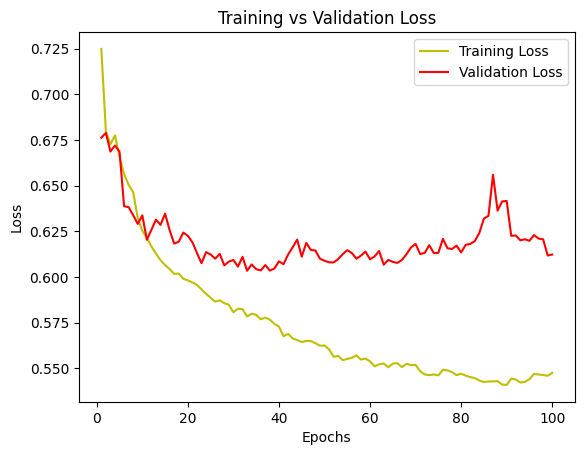

In [64]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

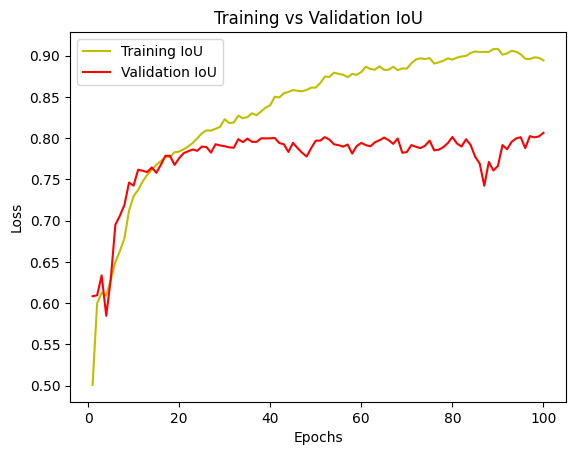

In [65]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, jaccard_coef, 'y', label='Training IoU')
plt.plot(epochs, val_jaccard_coef, 'r', label='Validation IoU')
plt.title('Training vs Validation IoU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [66]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 59}

In [67]:
y_pred = model.predict(X_test)

6/6 [==============================] - 4s 62ms/step


In [68]:
len(y_pred)

166

In [69]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [70]:
len(y_pred_argmax)

166

In [71]:
y_pred_argmax

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [72]:
y_test_argmax = np.argmax(y_test, axis=3)

In [73]:
y_test_argmax

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [94]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)
prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0, :, :]

1/1 [==============================] - 0s 21ms/step


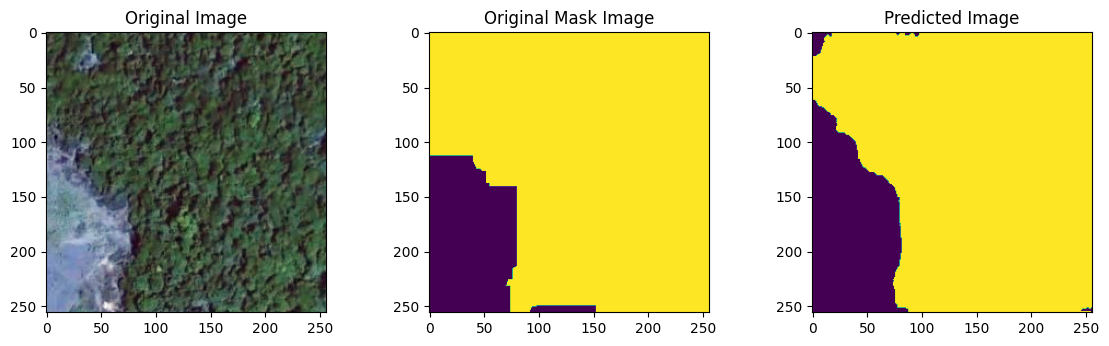

In [95]:
plt.figure(figsize=(14, 8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Mask Image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [76]:
#from sklearn.metrics import confusion_matrix, classification_report
#import numpy as np
#y_pred = model.predict(X_test)
#y_pred_classes = [np.argmax(element) for element in y_pred]

#print('Classification report \n', classification_report(y_test, y_pred_classes))

### Model saving and reloading

In [77]:
#model.get_config()

In [78]:
model.save('satellite-imagery.h5')

In [79]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Aug 10 11:38 .
drwxr-xr-x 1 root root 4.0K Aug 10 10:28 ..
drwxr-xr-x 4 root root 4.0K Aug  8 13:37 .config
drwx------ 6 root root 4.0K Aug 10 10:30 drive
drwxr-xr-x 1 root root 4.0K Aug  8 13:38 sample_data
-rw-r--r-- 1 root root  23M Aug 10 11:38 satellite-imagery.h5


In [80]:
from keras.models import load_model

In [81]:
model.loss.name

'dice_loss_plus_1focal_loss'

In [82]:
saved_model = load_model('/content/satellite-imagery.h5',
                         custom_objects=({'dice_loss_plus_1focal_loss':total_loss,
                                          'jaccard_coef':jaccard_coef}))

In [83]:
#plt.imshow(Image.open('/content/1.jpeg'))

In [84]:
#image = Image.open('/content/6.jpg')
#image = image.resize((256,256))
#image = np.array(image)
#image = np.expand_dims(image, 0)

In [85]:
#prediction = saved_model.predict(image)

In [86]:
#predicted_image = np.argmax(prediction, axis=3)
#predicted_image = predicted_image[0, :, :]

In [87]:
#plt.figure(figsize=(14, 8))
#plt.subplot(231)
#plt.title("Original Image")
#plt.imshow(Image.open('/content/6.jpg'))
#plt.subplot(232)
#plt.title("Predicted Image")
#plt.imshow(predicted_image)